## Improving the Deep Learning model

In [9]:
# Charging the necessary dependencies
import numpy as np                              # Library for using arrays and numeric calculus
import matplotlib.pyplot as plt                 # Library for plotting 
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [10]:
# Charging the data in tensorflow version
npz = np.load('Data_train.npz')
train_inputs = npz['inputs'].astype(float)           # To ensure that they are all floats, let's also take care of that
train_targets = npz['targets'].astype(float)         # Targets are also float values

npz = np.load('Data_test.npz')
test_inputs = npz['inputs'].astype(float)
test_targets = npz['targets'].astype(float)

npz = np.load('Data_valid.npz')
valid_inputs = npz['inputs'].astype(float)
valid_targets = npz['targets'].astype(float)

## Defining a baseline model

In [11]:
# Defining hyperparamters
input_size = 6                  # Set the input and output sizes
output_size = 1
hidden_layer_size = 50
batch_size = 32
max_epochs = 500
early_stopping = EarlyStopping(patience=60)

# Defining the model architecture
model = Sequential([
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (input_size,)),
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(hidden_layer_size, activation = 'relu', kernel_initializer = 'he_uniform'),
    Dense(output_size)
])

# Defining an optimizer
my_optimizer = Adam(lr= 0.0001) # , decay=1e-6
model.compile(optimizer = my_optimizer, loss='mse', metrics=['mae', 'mape'])

In [12]:
with open("model_summary_improved.txt", "w") as f:           # We open a file named "model_summary.txt" in written mode "w" and assigned it to the variable f
    model.summary(print_fn=lambda x: f.write(x +'\n')) # print_fn=lambda, write each line of the summary in the file utilizing the write method 
model.summary()                                     # Prints the model summary


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                350       
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 8,051
Trainable params: 8,051
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit the model
checkpointer=ModelCheckpoint(filepath='model_weights_best.hdf5', verbose=2, save_best_only=True)

modelo = model.fit(train_inputs, train_targets, batch_size= batch_size,
                   epochs = max_epochs, callbacks=[checkpointer, early_stopping],
                   validation_data = (valid_inputs, valid_targets),
                   verbose= 0, shuffle=False)


Epoch 00001: val_loss improved from inf to 4.61163, saving model to model_weights_best.hdf5

Epoch 00002: val_loss improved from 4.61163 to 1.17113, saving model to model_weights_best.hdf5

Epoch 00003: val_loss improved from 1.17113 to 0.51103, saving model to model_weights_best.hdf5

Epoch 00004: val_loss improved from 0.51103 to 0.37506, saving model to model_weights_best.hdf5

Epoch 00005: val_loss improved from 0.37506 to 0.30887, saving model to model_weights_best.hdf5

Epoch 00006: val_loss improved from 0.30887 to 0.25727, saving model to model_weights_best.hdf5

Epoch 00007: val_loss improved from 0.25727 to 0.21392, saving model to model_weights_best.hdf5

Epoch 00008: val_loss improved from 0.21392 to 0.17733, saving model to model_weights_best.hdf5

Epoch 00009: val_loss improved from 0.17733 to 0.14851, saving model to model_weights_best.hdf5

Epoch 00010: val_loss improved from 0.14851 to 0.12370, saving model to model_weights_best.hdf5

Epoch 00011: val_loss improved fr

In [14]:
loss = modelo.history['loss']
val_loss = modelo.history['val_loss']
epochs = range (len(loss))

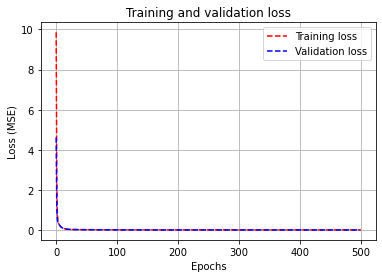

In [15]:
plt.plot(epochs, loss, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss, 'b--', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.savefig("loss_improved.pdf")

In [16]:
# Obtaing the evaluation metrics for the validation instance
valid_loss = model.evaluate(valid_inputs, valid_targets)
valid_loss

159/159 [==============================] - 0s 73us/step


[0.0013884895469454474, 0.02601232762747216, 1.1792103726908845]

### Checking testing instance

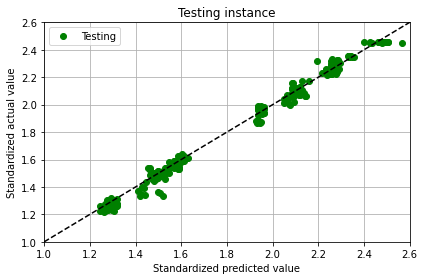

In [17]:
a = model.predict(test_inputs)
plt.plot(a, test_targets, 'go', label = 'Testing')
plt.title('Testing instance')
plt.xlabel('Standardized predicted value')
plt.ylabel('Standardized actual value')
plt.legend()
plt.axis([1, 2.6, 1, 2.6])
x = np.linspace(1, 3)
y = x
plt.plot(x, y, 'k--')
# fig = plt.figure.use('seaborn-v0_8', 'paper.mplstyle')
plt.grid()
plt.tight_layout()
plt.savefig("Testing_improved.pdf")

In [18]:
# Testing the model
test_loss = model.evaluate(test_inputs, test_targets)
test_loss

369/369 [==============================] - 0s 89us/step


[0.0016303421149590637, 0.027800017851720333, 1.3763089761501406]

In [19]:
# Computing the R2 score
r2_score(a, test_targets)

0.9983460873829302